<a href="https://colab.research.google.com/github/tanishadhakne/Data-visualization--vrinda-store-dataset/blob/main/data_visualization_of_vrinda_store_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import files
uploaded = files.upload()


Saving Vrinda Store Data Analysis.xlsx to Vrinda Store Data Analysis.xlsx


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel("/content/Vrinda Store Data Analysis.xlsx", engine='openpyxl')

df.head()

,index,Order ID,Cust ID,Gender,Age,Age Group,Date,Month,Status,Channel,...,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,\/,B2B
0,1,171-1029312-3038738,1029312,Women,44,Adults,2022-12-04,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,Teenager,2022-12-04,Dec,Delivered,Ajio,...,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,Senior,2022-12-04,Dec,Delivered,Myntra,...,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,Teenager,2022-12-04,Dec,Delivered,Amazon,...,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,Senior,2022-12-04,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [18]:
df.info()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             31047 non-null  int64         
 1   Order ID          31047 non-null  object        
 2   Cust ID           31047 non-null  int64         
 3   Gender            31047 non-null  object        
 4   Age               31047 non-null  int64         
 5   Age Group         31047 non-null  object        
 6   Date              31047 non-null  datetime64[ns]
 7   Month             31047 non-null  object        
 8   Status            31047 non-null  object        
 9   Channel           31047 non-null  object        
 10  SKU               31047 non-null  object        
 11  Category          31047 non-null  object        
 12  Size              31047 non-null  object        
 13  Qty               31047 non-null  int64         
 14  currency          3104

<ipython-input-25-645e9a90e67b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="Category", y="Amount", palette="viridis")


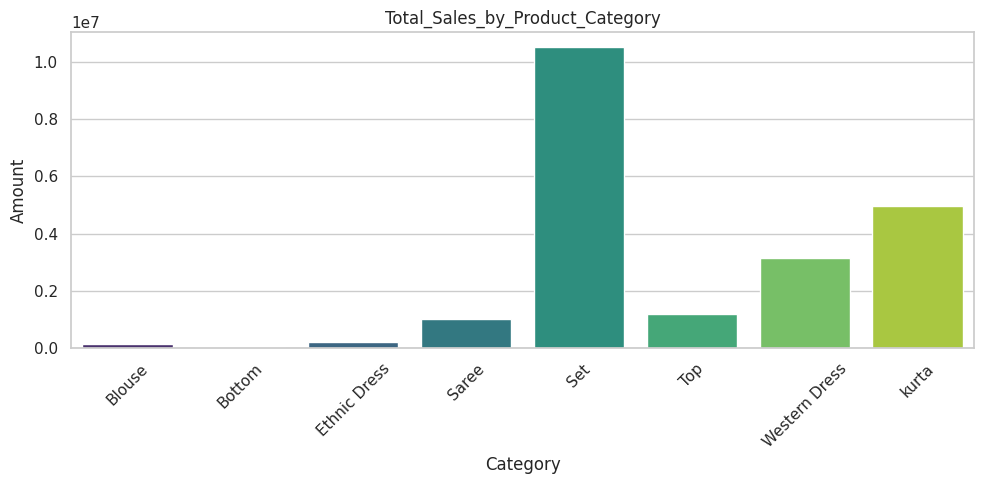

In [25]:
category_sales = df.groupby("Category")["Amount"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=category_sales, x="Category", y="Amount", palette="viridis")
plt.title("Total_Sales_by_Product_Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


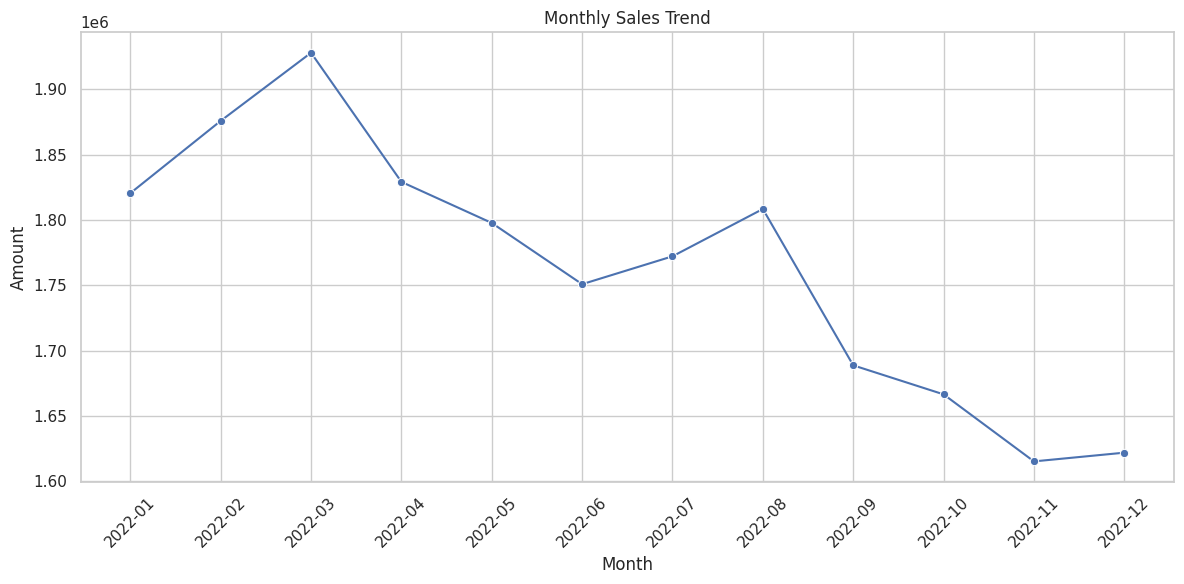

In [27]:

df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Amount"].sum().reset_index()
monthly_sales["Month"] = monthly_sales["Month"].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="Month", y="Amount", marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-29-66ed23ff94ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_sales, x="Gender", y="Amount", palette="magma")


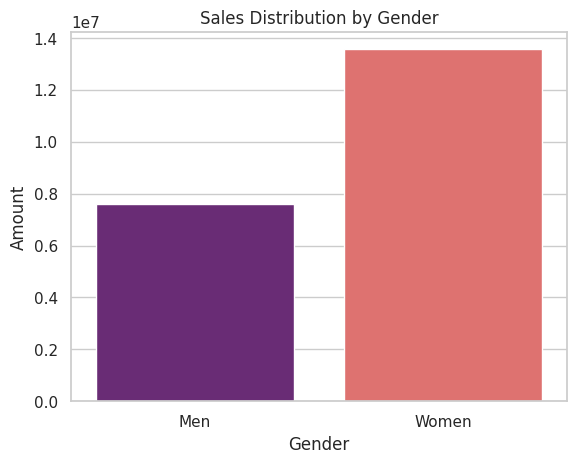

In [29]:
gender_sales = df.groupby("Gender")["Amount"].sum().reset_index()

sns.barplot(data=gender_sales, x="Gender", y="Amount", palette="magma")
plt.title("Sales Distribution by Gender")
plt.show()


<ipython-input-31-a759e09945c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="Amount", y="Category", palette="coolwarm")


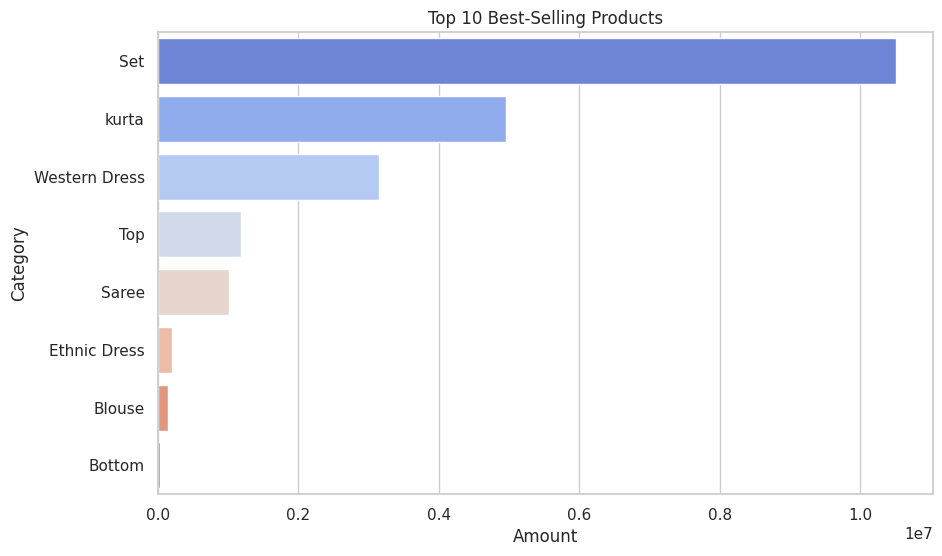

In [31]:
top_products = df.groupby("Category")["Amount"].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x="Amount", y="Category", palette="coolwarm")
plt.title("Top 10 Best-Selling Products")
plt.show()


<ipython-input-34-cccd8fab0794>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Age Group", data=df, palette="pastel")


Text(0.5, 1.0, 'Order Distribution by Age Group')

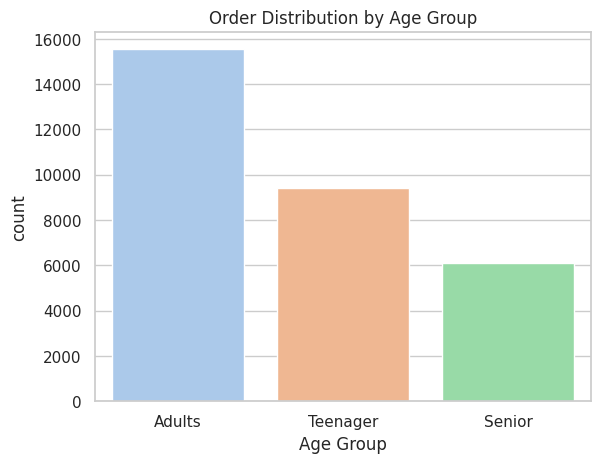

In [34]:
sns.countplot(x="Age Group", data=df, palette="pastel")
plt.title("Order Distribution by Age Group")


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Amazon'),
  Text(1, 0, 'Myntra'),
  Text(2, 0, 'Flipkart'),
  Text(3, 0, 'Ajio'),
  Text(4, 0, 'Nalli'),
  Text(5, 0, 'Meesho'),
  Text(6, 0, 'Others')])

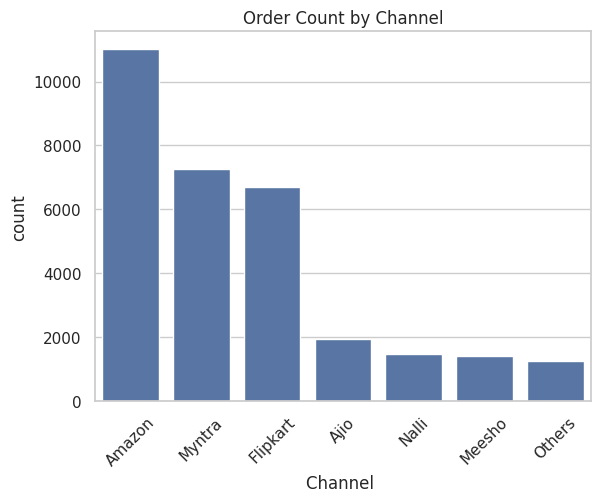

In [35]:
sns.countplot(x="Channel ", data=df, order=df["Channel "].value_counts().index)
plt.title("Order Count by Channel")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Top 10 Cities by Order Count')

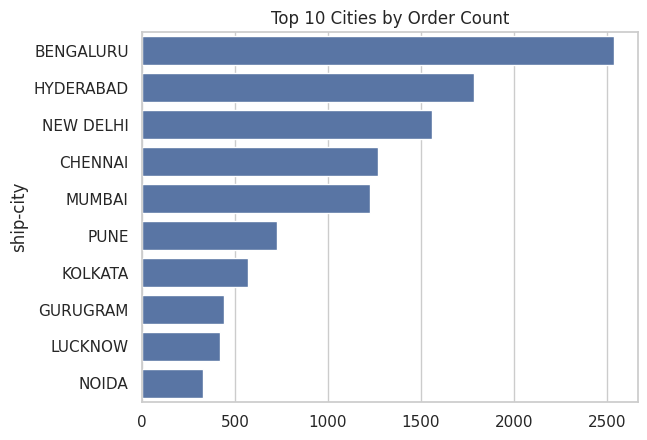

In [36]:
top_cities = df['ship-city'].value_counts().nlargest(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities by Order Count")


Text(0.5, 1.0, 'Average Order Value by Channel')

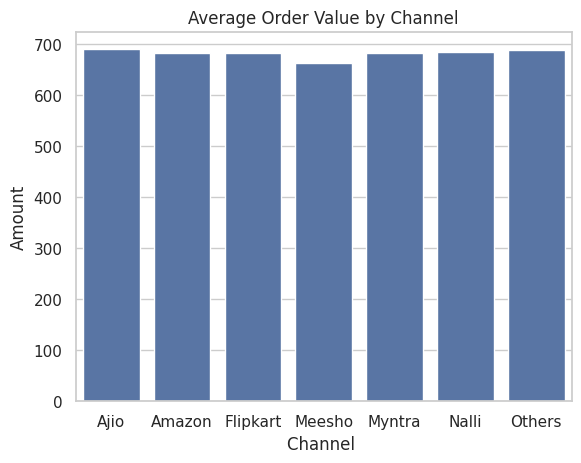

In [38]:
df['Order ID'] = df['Order ID'].astype(str)  # if needed
channel_avg = df.groupby("Channel ")["Amount"].mean().reset_index()
sns.barplot(data=channel_avg, x="Channel ", y="Amount")
plt.title("Average Order Value by Channel")


Text(0.5, 1.0, 'Distribution of Product Sizes Ordered')

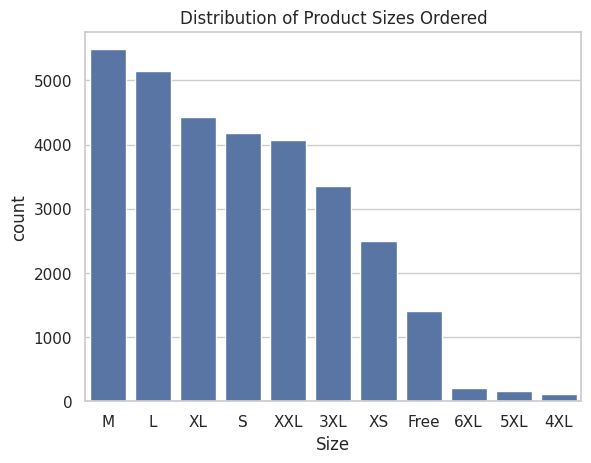

In [40]:
sns.countplot(data=df, x="Size", order=df["Size"].value_counts().index)
plt.title("Distribution of Product Sizes Ordered")
